#### Program 2.1
A Python Function for calculating the finite element solution of the model problem from chapter 2.


[[  1.   0.   0. ...   0.   0.   0.]
 [-40.  80. -40. ...   0.   0.   0.]
 [  0. -40.  80. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  80. -40.   0.]
 [  0.   0.   0. ... -40.  80. -40.]
 [  0.   0.   0. ...   0.   0.   1.]]


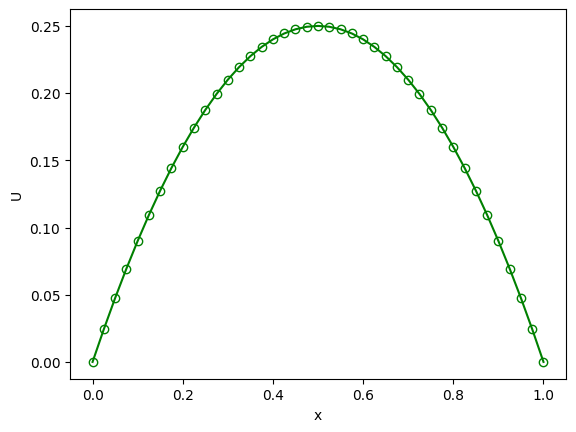

In [1]:
def Chap2_CalculateModelMemSolution(N):
    """
    A python function for calculating the finite element solution of the model problem.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Initiliaze A and b to zero
    A = np.zeros((N+1,N+1))
    b = np.zeros((N+1, 1))

    # Generate N+1 nodes, to divide the domain from 0 to 1 into N equal divisions:
    x = np.linspace(0, 1, N+1);

    # Loop over elements calculating local contributions and incrementing the global linear system

    for k in range(0,N):
        # Calculate element length
        h = 1/N

        # Calculate local cotributions
        A_local = np.array([ [1/h, -1/h], [-1/h, 1/h] ])
        b_local = np.array([ [h], [h] ])

        # Increment global system
        A[k:k+2,k:k+2] +=  A_local
        b[k:k+2] += b_local
        
    # Set Dirichlet boundary Condition
    A[0,:] = 0
    A[0,0] = 1
    A[N,:] = 0
    A[N,N] = 1
    b[0], b[N] = 0, 0

    print(A)
    
    # Solve linear system and plot FE solution
    # AU = b
    U = np.linalg.inv(A).dot(b)

    # print(U)
    plt.plot(x,U,'-o',mfc='none', color='g')
    plt.xlabel("x")
    plt.ylabel("U")


Chap2_CalculateModelMemSolution(40)
    

